# scikit-learn을 이용한 선형회귀와 로지스틱 회귀

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['C1', 'C2'])
cm2_inv = ListedColormap(['C2', 'C1'])

## 데이터 로드

In [23]:
# 여기서부터 시작
D = np.load('basic_clfreg2.npz')

In [24]:
X_clf = D['X_clf']
y_clf = D['y_clf']

X_reg = D['X_reg']
y_reg = D['y_reg']

## 데이터 확인

### 분류 데이터

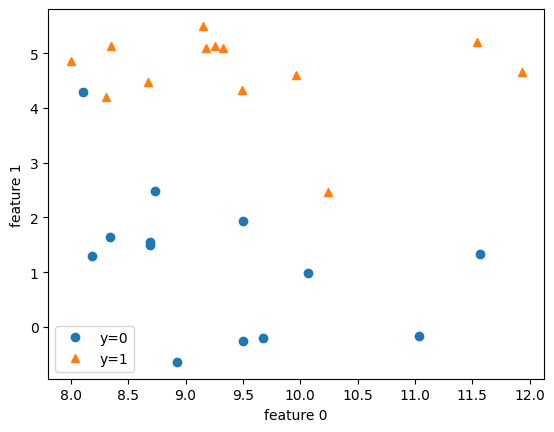

In [25]:
fig = plt.figure()
ax = plt.axes()

ax.plot(X_clf[y_clf==0][:,0], X_clf[y_clf==0][:,1], 'o', label='y=0')
ax.plot(X_clf[y_clf==1][:,0], X_clf[y_clf==1][:,1], '^', label='y=1')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')

ax.legend()

plt.show()

### 회귀 데이터

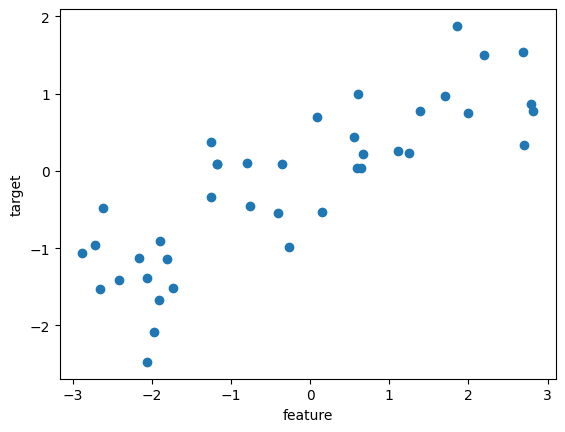

In [26]:
fig = plt.figure()
ax = plt.axes()

ax.plot(X_reg, y_reg, 'o')

ax.set_xlabel('feature')
ax.set_ylabel('target')

plt.show()

### 데이터 학습, 테스트 세트로 나누기

In [27]:
# 학습, 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, random_state=8)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, random_state=0)

## 선형회귀 Linear Regression

### 개요

- 다음 선형식에 의해 입력에 대한 결과값을 예측

$$
\hat{y} = w_1 x + w_0
$$

- 또는 벡터의 경우

$$
\hat{y} = \mathbf{w}^T \mathbf{x} + w_0
$$

- 알고리즘의 목적은 $\mathbf{w}$, $w_0$를 찾는 것

In [28]:
# 모델로드 [+]
from sklearn.linear_model import LinearRegression

In [29]:
# fit [+]
lr = LinearRegression().fit(X_reg_train, y_reg_train)

### 학습된 파라미터 확인

In [30]:
# 기울기와 y절편 확인 [+]
lr.coef_, lr.intercept_

# 기울기는 array(1차원이므로)..

(array([0.52424272]), -0.09394309015377249)

### 성능 확인

In [31]:
# R2 score
print(f"훈련 세트 점수:{lr.score(X_reg_train, y_reg_train):.2f}")
print(f"테스트 세트 점수:{lr.score(X_reg_test, y_reg_test):.2f}")

훈련 세트 점수:0.69
테스트 세트 점수:0.63


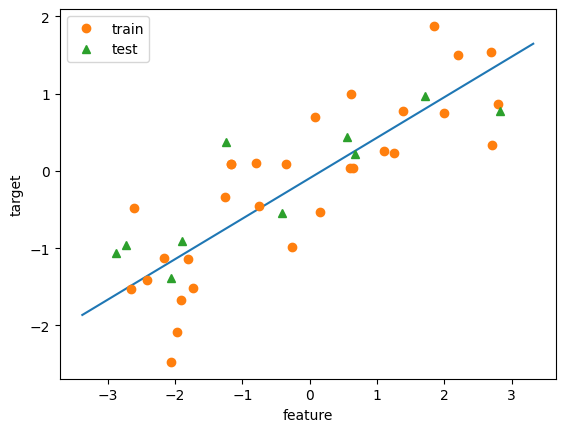

In [32]:
# 그림으로 확인[+]

fig = plt.figure(dpi=100)
ax = plt.axes()

########################################[+]
eps = 0.5
x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100)

y_lr = lr.predict(x.reshape(-1,1))
ax.plot(x, y_lr)
########################################

ax.plot(X_reg_train, y_reg_train, 'o', label='train')
ax.plot(X_reg_test, y_reg_test, '^', label='test')
ax.legend()
ax.set_xlabel('feature')
ax.set_ylabel('target')

plt.show()



- 이렇게 적절한 직선을 찾을 수 있는 이유는 다음 식을 최소화하도록 $w$, $b$가 결정되기 때문

$$
MSE = \frac{1}{2N}\sum_i^N (\hat{y}_i - y_i)^2
$$

- 위 함수를 평균제곱오차Mean Squared Error라고 함

## 릿지회귀(L2 규제)

- 모델에 규제항을 추가

- 규제가 없으면 학습데이터에 최대한 맞추게 됨

- 규제는 최대한 학습데이터에 모델을 맞추는 현상을 억제하게 되므로 규제regularization이라는 명칭이 사용

- 결과적으로 학습데이터에 약간 덜 맞더라도 테스트 데이터 또는 새로운 데이터는 조금 더 잘맞는 일반적인 모델을 만들기 위한 목적

In [33]:
# 모델 로드 [+]
from sklearn.linear_model import Ridge

In [34]:
# fit [+]
ridge = Ridge(alpha=1.0).fit(X_reg_train, y_reg_train)

#y^=w1x+w0
# alpha가 커지면 w를 찍어내리는 힘이 강해진다 -> 기울기가 낮춰진다

- `alpha`는 규제의 강도를 조절하는 숫자로 크면 클 수록 규제가 강해짐

- `alpha` 기본값: `alpha=1`



### 성능 확인

In [35]:
print(f"훈련 세트 점수:{ridge.score(X_reg_train, y_reg_train):.2f}")
print(f"테스트 세트 점수:{ridge.score(X_reg_test, y_reg_test):.2f}")

훈련 세트 점수:0.69
테스트 세트 점수:0.64


In [36]:
# alpha값을 3, 8, 30로 바꿔가면서 테스트 세트에 대한 R2 score를 확인해보세요.[*]

for alpha in [3., 8., 30.]:
    ridge_alpha = Ridge(alpha=alpha).fit(X_reg_train, y_reg_train)
    print(f"alpha={alpha} 훈련 세트 점수:{ridge_alpha.score(X_reg_train, y_reg_train):.2f}")
    print(f"alpha={alpha} 테스트 세트 점수:{ridge_alpha.score(X_reg_test, y_reg_test):.2f}")
    print("\n")

alpha=3.0 훈련 세트 점수:0.69
alpha=3.0 테스트 세트 점수:0.65


alpha=8.0 훈련 세트 점수:0.68
alpha=8.0 테스트 세트 점수:0.69


alpha=30.0 훈련 세트 점수:0.64
alpha=30.0 테스트 세트 점수:0.75





- `alpha`가 커지면 `w`가 작아지면서 규제가 크게 걸림

- 작동 방식은 학습하는 `w`가 잘 움직이지 못하도록 막아서 모델의 적응 범위를 한정하는 원리로 작동

- 구체적으로는 아래 식으로 작동

$$
MSE = \frac{1}{2}\sum_i^N (\hat{y}_i - y_i)^2 + \frac{\alpha}{2} \sum_{j=1}^D w_j^2
$$

- 기울기가 너무 커지지 않도록 아래 값을 더함으로써 보상을 해줌(기울기가 커지게 되면 MSE가 커지게 됨) $$\frac{\alpha}{2} \sum_{j=1}^D w_j^2$$
- 오차 함수에 $w_j$를 더해서 $w_j$가 커지면 오차가 커지게 됨

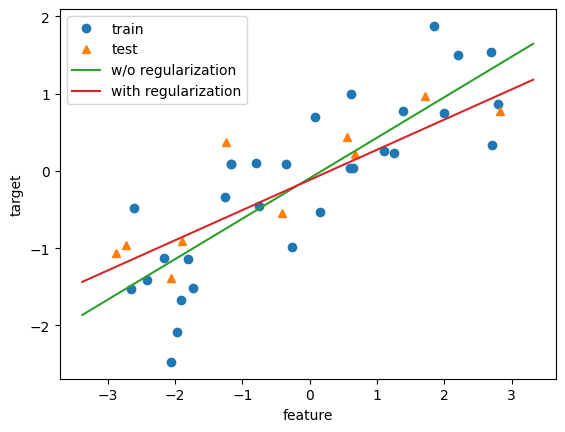

In [37]:
# 그림으로 확인
fig = plt.figure(dpi=100)
ax = plt.axes()
eps = 0.5

x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100)

#########################################[*]
# y_lr에 lr의 예측을
# y_ridge_alpha에 ridge_alpha의 예측을
# 저장하고 그림그리기
y_lr = lr.predict(x.reshape(-1,1))
y_ridge_alpha = ridge_alpha.predict(x.reshape(-1,1))
#########################################

ax.plot(X_reg_train, y_reg_train, 'o', label='train')
ax.plot(X_reg_test, y_reg_test, '^', label='test')

ax.plot(x, y_lr, label='w/o regularization')
ax.plot(x, y_ridge_alpha, label='with regularization')

ax.legend()
ax.set_xlabel('feature')
ax.set_ylabel('target')

plt.show()

# alpha가 커지면 나타나는 현상을 이해할 수 있나요?

### 선형회귀와 릿지회귀 계수 비교

In [38]:
# 내부 속성으로 계수 비교[+]
lr.coef_, ridge_alpha.coef_

(array([0.52424272]), array([0.39068396]))

## 로지스틱회귀 Logistic Regression

### 개요

- 선형회귀의 출력(스코어 또는 로짓이라고 함)을 다음 로지스틱 시그모이드 함수에 입력하여 0,1사이의 값으로 만들어 분류문제를 풀게 됨

$$
z = \mathbf{w}^T \mathbf{x} + w_0
$$

$$
\hat{y} = \sigma(z) = \frac{1}{1+e^{-z}}
$$

- y^ 출력 : 0~1사이

- 위 식 값이 특정값(threshold, 보통 0.5)보다 크면 1(positive), 작으면 0(negative)로 판단

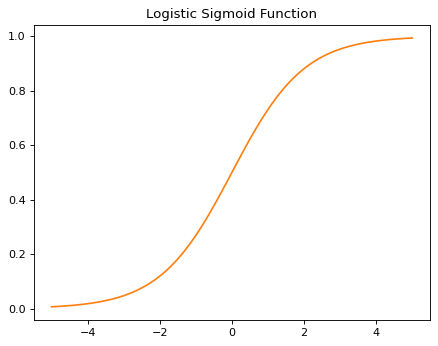

In [39]:
x = np.linspace(-5,5,100)

fig = plt.figure(dpi=80)
ax = plt.axes()

ax.plot(x, 1 / (1+np.exp(-x)), color='C1')
ax.set_title("Logistic Sigmoid Function")

plt.show()

### 이진분류를 위한 목적함수

- 이진분류인 경우 $i$번째 데이터 $\mathbf{x}_i$에 대한 정답 $y_i$는 0 또는 1인 숫자

- 이진분류에서 목적함수

$$
\ell(W) = -\sum_{i}^N y_i \log\left(\sigma(z_i(\mathbf{x}_i;W))\right) + (1-y_i) \log\left( 1-\sigma(z_i(\mathbf{x}_i;W)) \right)
$$


- 목적함수의 동작원리는 [여기](https://metamath1.github.io/noviceml/toyclassifier2.html)에서 직접 실습할 수 있음


In [40]:
# 모델 로드 [+]
from sklearn.linear_model import LogisticRegression

In [41]:
# 규제 없는 모델 fit [+]
logreg = LogisticRegression(penalty=None).fit(X_clf_train, y_clf_train)

In [42]:
print(f"학습 세트 정확도: {logreg.score(X_clf_train, y_clf_train):.2f}")
print(f"테스트 세트 정확도: {logreg.score(X_clf_test, y_clf_test):.2f}")

학습 세트 정확도: 1.00
테스트 세트 정확도: 0.71


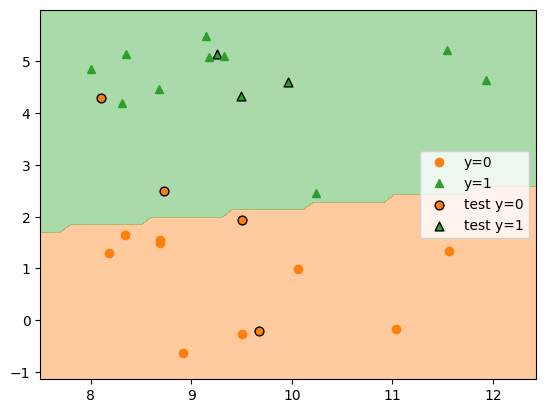

In [43]:
# 그림으로 확인
ngrid = 50
eps = 0.5

# 데이터의 최소, 최대값 보다 eps만큼 바깥 영역에서 그리드를 짠다.
x_min, x_max = X_clf[:, 0].min() - eps, X_clf[:, 0].max() + eps
y_min, y_max = X_clf[:, 1].min() - eps, X_clf[:, 1].max() + eps
xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy)

# 그리드를 1차원을 펼치고 contour를 그릴 레벨설정
X_grid = np.c_[X1.ravel(), X2.ravel()]
levels = [0, 0.5, 1]

fig = plt.figure(dpi=100)
ax = plt.axes()

decision_values = logreg.predict(X_grid)

# 결정경계를 그리고
ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels=levels, colors=['C1', 'C2'],
            alpha=0.4)

# 학습 데이터를 그리고
ax.plot(X_clf_train[y_clf_train==0][:,0],
            X_clf_train[y_clf_train==0][:,1], 'o', color='C1', label='y=0')
ax.plot(X_clf_train[y_clf_train==1][:,0],
            X_clf_train[y_clf_train==1][:,1], '^', color='C2',label='y=1')

# 테스트 데이터를 그린다.
ax.scatter(X_clf_test[y_clf_test==0][:,0],
                X_clf_test[y_clf_test==0][:,1], marker='o', color='C1', edgecolor='k',
                s=40, label='test y=0')
ax.scatter(X_clf_test[y_clf_test==1][:,0],
                X_clf_test[y_clf_test==1][:,1], marker='^', color='C2', edgecolor='k',
                s=40, label='test y=1')

ax.legend()

plt.show()


### 규제항 조정

- `C`: Inverse of regularization strength, `default=1`

- `C`가 커지면 규제가 사라지고, `C`가 작아지면 규제가 크게 걸림

In [44]:
# 규제 추가[+]
logreg_L2 = LogisticRegression(C=0.1).fit(X_clf_train, y_clf_train)

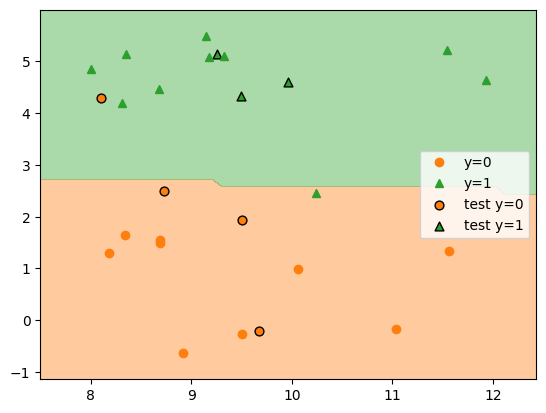

학습 세트 정확도: 0.95
테스트 세트 정확도: 0.86


In [45]:
# 그림으로 확인
ngrid = 50
eps = 0.5

# 데이터의 최소, 최대값 보다 eps만큼 바깥 영역에서 그리드를 짠다.
x_min, x_max = X_clf[:, 0].min() - eps, X_clf[:, 0].max() + eps
y_min, y_max = X_clf[:, 1].min() - eps, X_clf[:, 1].max() + eps
xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy)

# 그리드를 1차원을 펼치고 contour를 그릴 레벨설정
X_grid = np.c_[X1.ravel(), X2.ravel()]
levels = [0, 0.5, 1]

fig = plt.figure(dpi=100)
ax = plt.axes()

decision_values = logreg_L2.predict(X_grid)

# 결정경계를 그리고
ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels=levels, colors=['C1', 'C2'],
            alpha=0.4)

# 학습 데이터를 그리고
ax.plot(X_clf_train[y_clf_train==0][:,0],
            X_clf_train[y_clf_train==0][:,1], 'o', color='C1', label='y=0')
ax.plot(X_clf_train[y_clf_train==1][:,0],
            X_clf_train[y_clf_train==1][:,1], '^', color='C2',label='y=1')

# 테스트 데이터를 그린다.
ax.scatter(X_clf_test[y_clf_test==0][:,0],
                X_clf_test[y_clf_test==0][:,1], marker='o', color='C1', edgecolor='k',
                s=40, label='test y=0')
ax.scatter(X_clf_test[y_clf_test==1][:,0],
                X_clf_test[y_clf_test==1][:,1], marker='^', color='C2', edgecolor='k',
                s=40, label='test y=1')

ax.legend()
plt.show()

print(f"학습 세트 정확도: {logreg_L2.score(X_clf_train, y_clf_train):.2f}")
print(f"테스트 세트 정확도: {logreg_L2.score(X_clf_test, y_clf_test):.2f}")


## 실습과제: 실제 데이터에 적용[*]

### 분류: 유방암 데이터

- 아래 로드된 유방암 데이터의 특성을 조사하고 최적의 `C`를 찾아보세요.

In [46]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [47]:
# 로지스틱 회귀에서 기본 규제가 C=1로 걸린 상태에서
# 학습세트와 테스트세트에 대해서 성능 확인
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
# max_iter : 기울기 소실법을 통해 몇번까지 찾아갈것인지

print(f"학습 세트 정확도: {logreg.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {logreg.score(X_test, y_test):.3f}")

학습 세트 정확도: 0.958
테스트 세트 정확도: 0.958


In [48]:
training_accuracy = []
test_accuracy = []

# 적당하게 규제 값을 설정하고 반복적으로 알고리즘을 적용하기[*]
Cs = [0.001, 0.01, 0.1, 1, 10, 100]

#############################################################
# WRITE YOUR CODE HERE
for C in Cs:
    # 모델 생성
    logreg = LogisticRegression(C=C, max_iter=5000)

    # 모델 피팅
    logreg.fit(X_train, y_train)

    # 훈련 세트 정확도 저장
    training_accuracy.append(logreg.score(X_train, y_train))

    # 테스트 세트 정확도 저장
    test_accuracy.append(logreg.score(X_test, y_test))

################################################################


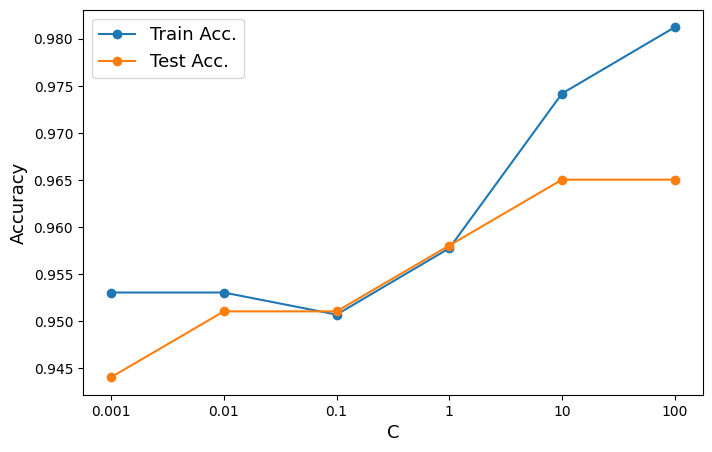

In [49]:
# 저장된 정확도를 그림
fig = plt.figure(figsize=(8,5))
ax = plt.axes()

ax.plot(np.arange(len(Cs)), training_accuracy, 'o-', label="Train Acc.")
ax.plot(np.arange(len(Cs)), test_accuracy, 'o-', label="Test Acc.")

ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels([0.001, 0.01, 0.1, 1, 10, 100])

ax.set_ylabel("Accuracy", size=13)
ax.set_xlabel("C", size=13)
ax.legend(fontsize=13)

plt.show()

- 위 그래프를 보고 성능을 더 높이려면 규제를 100보다 더 풀어야 할까 0.001보다 다 걸어야할지 생각해보고

- 테스트 세트에 대해 0.965보다 더 높은 성능을 얻기 위한 규제를 설정하고 학습후 확인하시요.

In [52]:
# 위 그래프를 보고 성능을 더 높이려면 규제를 100보다 더 풀어야 할까 0.001보다 다 걸어야할까...[+]
# 테스트 세트에 대해 0.965보다 더 높은 성능을 얻기 위한 규제를 설정하고 학습후 확인하시요.

logreg_best = LogisticRegression(C=1000, max_iter=10000).fit(X_train, y_train)

print(f"학습 세트 정확도: {logreg_best.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {logreg_best.score(X_test, y_test):.3f}")

학습 세트 정확도: 0.986
테스트 세트 정확도: 0.972


## 다중분류 문제



- 소프트맥스 함수를 쓰는 예외적인 경우를 제외하고 기본적으로 이진분류만 지원하기 때문에 one-vs-rest 전략을 사용한다.

### 데이터 생성

In [53]:
from sklearn.datasets import make_blobs

In [54]:
X, y = make_blobs(random_state=42)

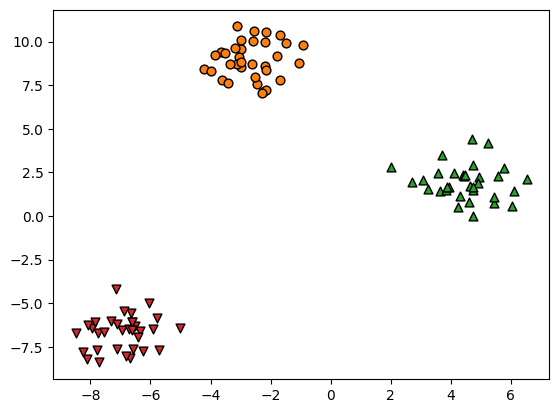

In [55]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k')
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k')
ax.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k')

plt.show()

### One-vs-Rest 전략

- 위와 같은 3 클래스 분류 문제에 있어서 다음과 같은 데이터 세트 세개에 대해서 각각 분류기를 만드는 방식으로 동작

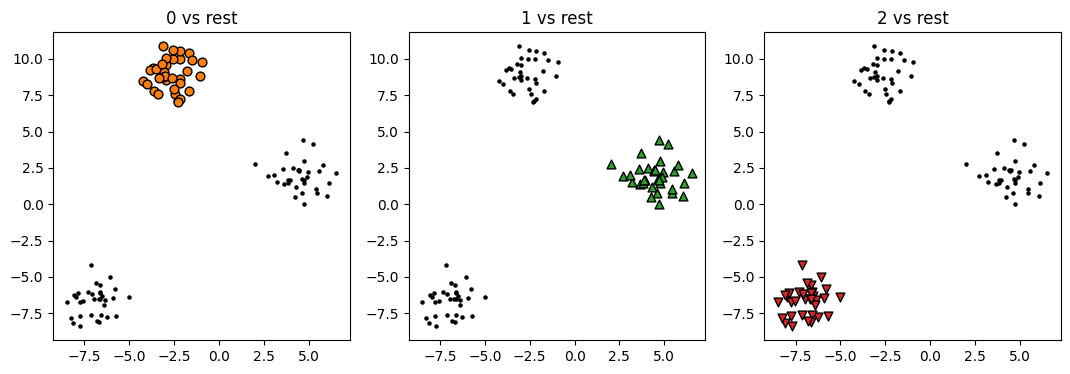

In [56]:
fig, ax = plt.subplots(figsize=(13,4), nrows=1, ncols=3, dpi=100)
markers = ['o', '^', 'v']

for i in range(3):
    ax[i].scatter(X[y==i][:,0], X[y==i][:,1],
               marker=markers[i], s=40, color=f'C{i+1}', edgecolor='k')
    ax[i].scatter(X[y!=i][:,0], X[y!=i][:,1],
               marker='.', s=20, color='k', edgecolor='k')

    ax[i].set_title(f"{i} vs rest")

plt.show()



- 각 $k$개 분류기가 개별적으로 학습됨

- 예측은 다음 식에 의해 결정

$$
\hat{k} = \underset{k}{\text{argmax}} \,\, \mathbf{w}_k^T\mathbf{x} + b_k
$$

- 이렇게 각각 세 번 세개 분류기를 학습하는 방식을 One-vs-Rest 전략이라고 함

In [57]:
# 모델 생성과 fit[+]
logreg = LogisticRegression(multi_class='ovr').fit(X, y)

In [58]:
# 가중치, 한 행이 분류기 하나를 의미
# 3개의 클래스에 대한 분류이므로 3행
# EX)펭귄분류기에서 라이브러리 없이 사용한 것과 같다

logreg.coef_

array([[-0.68329705,  1.06169509],
       [ 1.36537961, -0.32670774],
       [-0.61161973, -0.73287599]])

In [59]:
# 절편
logreg.intercept_

array([-5.28341212,  0.54307525, -2.64719253])

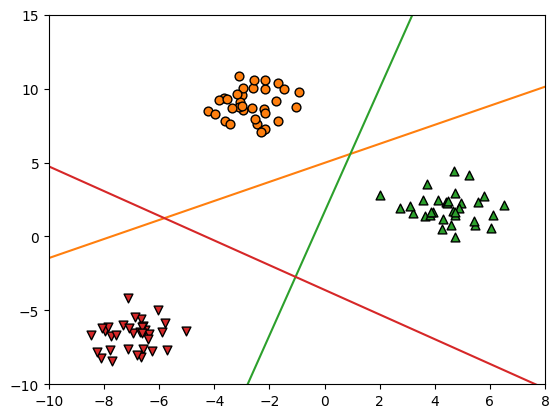

In [60]:
# 각 분류기의 결정 경계
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k')
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k')
ax.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k')

x = np.linspace(-10, 8)
for coef, intercept, color in zip(logreg.coef_, logreg.intercept_, ['C1', 'C2', 'C3']):
    # coef[0]*x + coef[1]*y + b = 0 [+]
    plt.plot(x, -(x * coef[0] + intercept) / coef[1], c=color)

ax.set_ylim(-10, 15)
ax.set_xlim(-10, 8)

plt.show()

- 결정 경계를 보면 두 클래스가 동시에 Positive인 경우가 있는데 이때는 선형식의 결과값(스코어)으로 결정

- 예를 들어 가운데 삼각형 영역은 세 클래스 모두 해당되지 않지만 스코어로 결정영역을 그려보면

In [61]:
from matplotlib.colors import ListedColormap
cm3 = ListedColormap(['C1', 'C2', 'C3'])

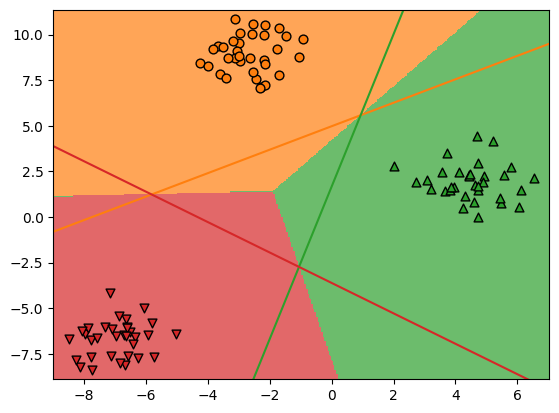

In [62]:
# 그림으로 확인
ngrid = 300
eps = 0.5

# 데이터의 최소, 최대값 보다 eps만큼 바깥 영역에서 그리드를 짠다.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy)

# 그리드를 1차원을 펼치고 contour를 그릴 레벨설정
X_grid = np.c_[X1.ravel(), X2.ravel()]

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k')
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k')
ax.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k')

x = np.linspace(-10, 8)
for coef, intercept, color in zip(logreg.coef_, logreg.intercept_, cm3.colors):
    plt.plot(x, -(x * coef[0] + intercept) / coef[1], c=color)

decision_values = logreg.predict(X_grid)

# 결정경계를 그리고
ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max, y_min, y_max),
              aspect='auto', origin='lower', alpha=0.7, cmap=cm3)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

- 데이터에 가까운 쪽으로 결정되는 결과를 확인

### 소프트맥스 회귀

- `multi_class='multinomial'`로 설정

- `ovr`방식이 개별 분류기를 따로 학습하는 반면 이 방식은 한번에 모든 분류기를 학습

- 그렇게 하기 위해 여러 분류기의 출력 $z_k$를 개별 로지스틱 시그모이드 함수에 입력하지 않고 아래 소프트 맥스 함수에 입력하여 한꺼번에 확률값으로 변환

$$
\text{softmax}_j(\mathbf{z}) = \frac{e^{z_j}}{\sum_{k}e^{z_k}}
$$


In [73]:
# 소프트맥스 함수 실험
from scipy.special import softmax

scores = [10.34, 20.23, 4.56]

# 직접 만든 소프트맥스
print(np.exp(scores) / sum(np.exp(scores)))
print(softmax(scores))


[5.06763698e-05 9.99949167e-01 1.56524884e-07]
[5.06763698e-05 9.99949167e-01 1.56524884e-07]


In [74]:
# 모델 생성과 fit[+]
logreg = LogisticRegression(multi_class='multinomial').fit(X, y)

In [75]:
# 가중치
logreg.coef_

array([[-0.38486163,  0.62874226],
       [ 0.74106233, -0.17664082],
       [-0.3562007 , -0.45210144]])

In [76]:
# 절편
logreg.intercept_

array([-1.63102014,  1.85764971, -0.22662957])

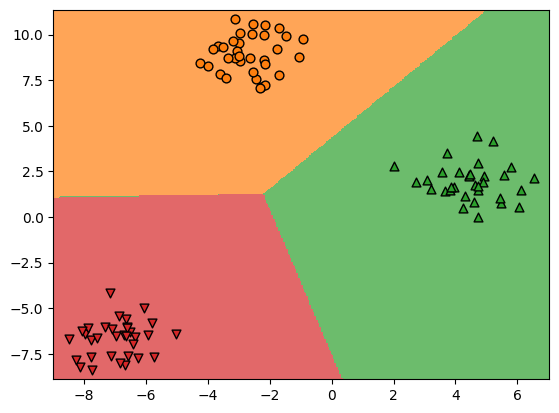

In [77]:
# 그림으로 확인
ngrid = 300
eps = 0.5

# 데이터의 최소, 최대값 보다 eps만큼 바깥 영역에서 그리드를 짠다.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy)

# 그리드를 1차원을 펼치고 contour를 그릴 레벨설정
X_grid = np.c_[X1.ravel(), X2.ravel()]
levels = [0, 0.5, 1, 1.5, 2.0]

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k')
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k')
ax.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k')

decision_values = logreg.predict(X_grid)

# 결정영역                                   이거 없으면 0,0에서 부터 그리기 시작
ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max, y_min, y_max),
              aspect='auto', origin='lower', alpha=0.7, cmap=cm3)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

## 장단점

- 장점
    - 이해하기 쉬움
    - 학습과 예측이 빠름
    - 대용량 데이터에 우선 적용해봄직 함
     
- 단점
    - 입력과 출력의 복잡한 관계를 표현하기 어려움
    - 결정된 회귀계수를 해석하기 어려울 수 있음
    - 정답과 예측의 오차합을 기준으로 하므로 데이터 정규화, 표준화 같은 전처리 중요
